<a href="https://colab.research.google.com/github/tejasprashar/Mental_Health_prediction_model/blob/main/mental_health_prediction_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading data and working on it (tabular and numerical)

import pandas as pd
import numpy as np

# Libraries to perform statistical analysis
import scipy.stats as stats
import sklearn

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# statemodels
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To build logistic regression model
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libraries to import different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Loading the survey into out notebook
mhdata = pd.read_csv('mhsurvey.csv')

In [ ]:
# Checking the dimensions of our data
mhdata.shape

(1259, 27)

In [ ]:
# Taking a peak at the first five entries in our dataset
mhdata.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
# Checking for data types of each attribute
mhdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
# Checking for missing values
mhdata.isna().apply(pd.value_counts).T


,False,True
Timestamp,1259.0,NaN
Age,1259.0,NaN
Gender,1259.0,NaN
Country,1259.0,NaN
state,744.0,515.0
self_employed,1241.0,18.0
family_history,1259.0,NaN
treatment,1259.0,NaN
work_interfere,995.0,264.0
no_employees,1259.0,NaN


In [ ]:
# Checking for duplicates in the dataset
mhdata.duplicated().any()

False

In [ ]:
# Dropping columns not needed/ not useful for EDA and modeling
mhdata.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

In [ ]:
# Renaming columns for uniformity and ease of understanding. We like uniformity!
mhdata.rename({'self_employed' : 'Self_Employed', 'family_history' : 'Family_History',
           'treatment' : 'Treatment', 'work_interfere' : 'Work_Interfere',
           'no_employees': 'Employee_Count_Company', 'remote_work': 'Remote_Work', 'tech_company': 'Tech_Company',
           'benefits': 'Benefits', 'care_options': 'Care_Options', 'wellness_program': 'Wellness_Program',
           'seek_help': 'Seek_Help', 'anonymity': 'Anonymity', 'leave': 'Medical_Leave',
           'mental_health_consequence': 'Mental_Health_Consequence',
           'phys_health_consequence': 'Physical_Health_Consequence', 'coworkers': 'Coworkers_Reach',
           'supervisor': 'Supervisor_Reach', 'mental_health_interview': 'Mental_Health_Interview',
           'phys_health_interview': 'Physical_Health_Interview', 'mental_vs_physical': 'Mental_VS_Physical',
           'obs_consequence': 'Observed_Consequence_Workplace'} , inplace = True , axis = 1)

In [ ]:
# Checking the entries for age
mhdata['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [ ]:
# calculating the median age
median_age = mhdata['Age'].median()
print(median_age)

31.0


In [ ]:
# since some of data are impossible to work with, we will replace impossible values with the median age
mhdata['Age'].replace([mhdata['Age'][mhdata['Age'] < 15]], median_age, inplace = True)
mhdata['Age'].replace([mhdata['Age'][mhdata['Age'] > 100]], median_age, inplace = True)

mhdata['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

In [ ]:
# Checking the entries for gender
mhdata['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [ ]:
# We will only limit our analysis to three categories
mhdata['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

mhdata['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

mhdata["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Queer', inplace = True)

In [ ]:
mhdata['Gender'].value_counts()

Gender
Male      991
Female    247
Queer      21
Name: count, dtype: int64

In [ ]:
# we want to make sure that the answers are limited to boolean-like values
columns_to_print = ['Self_Employed', 'Family_History','Treatment', 'Work_Interfere', 'Employee_Count_Company', 'Remote_Work',
                    'Tech_Company', 'Benefits', 'Care_Options', 'Wellness_Program',
                    'Seek_Help', 'Anonymity', 'Medical_Leave', 'Mental_Health_Consequence',
                    'Physical_Health_Consequence', 'Coworkers_Reach', 'Supervisor_Reach',
                    'Mental_Health_Interview', 'Physical_Health_Interview', 'Mental_VS_Physical',
                    'Observed_Consequence_Workplace']

for column in columns_to_print:
    print(f"{column}:")
    print(mhdata[column].value_counts())
    print()

Self_Employed:
Self_Employed
No     1095
Yes     146
Name: count, dtype: int64

Family_History:
Family_History
No     767
Yes    492
Name: count, dtype: int64

Treatment:
Treatment
Yes    637
No     622
Name: count, dtype: int64

Work_Interfere:
Work_Interfere
Sometimes    465
Never        213
Rarely       173
Often        144
Name: count, dtype: int64

Employee_Count_Company:
Employee_Count_Company
6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: count, dtype: int64

Remote_Work:
Remote_Work
No     883
Yes    376
Name: count, dtype: int64

Tech_Company:
Tech_Company
Yes    1031
No      228
Name: count, dtype: int64

Benefits:
Benefits
Yes           477
Don't know    408
No            374
Name: count, dtype: int64

Care_Options:
Care_Options
No          501
Yes         444
Not sure    314
Name: count, dtype: int64

Wellness_Program:
Wellness_Program
No            842
Yes           229
Don't know   

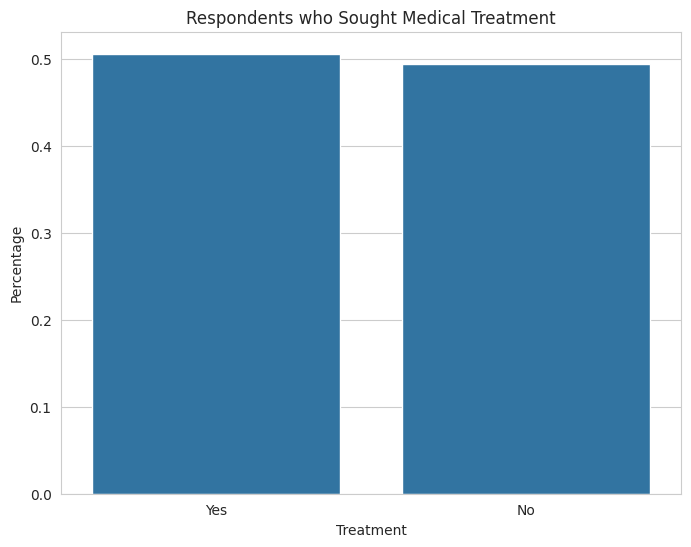

In [ ]:
# Chart for whether respondent sought medical treatment or not
sns.set_style("whitegrid")
plt.figure(figsize = (8,6))
eda_percentage = mhdata['Treatment'].value_counts(normalize = True).rename_axis('Treatment').reset_index(name = 'Percentage')
sns.barplot(x = 'Treatment', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Respondents who Sought Medical Treatment')
plt.show()

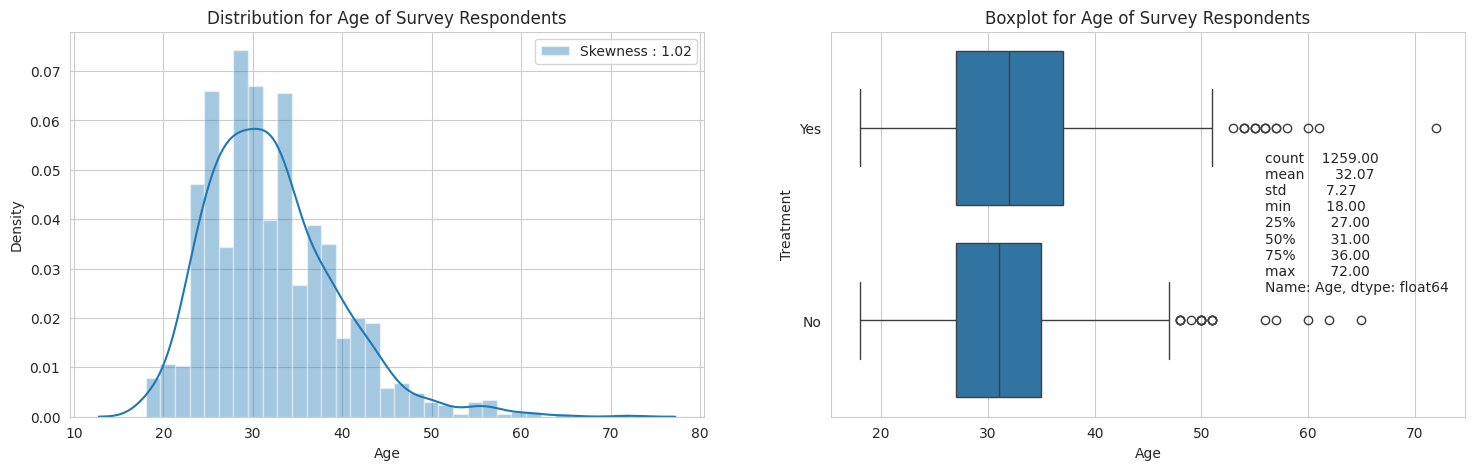

In [ ]:
# Chart for Age
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.distplot(mhdata['Age'], label = 'Skewness : %.2f'%(mhdata['Age'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for Age of Survey Respondents')
plt.subplot(1,2,2)
sns.boxplot(x = "Age", y = "Treatment", data = mhdata)
plt.title('Boxplot for Age of Survey Respondents')
age = str(mhdata['Age'].describe().round(2))
plt.text(56, 0.85, age)
plt.show()

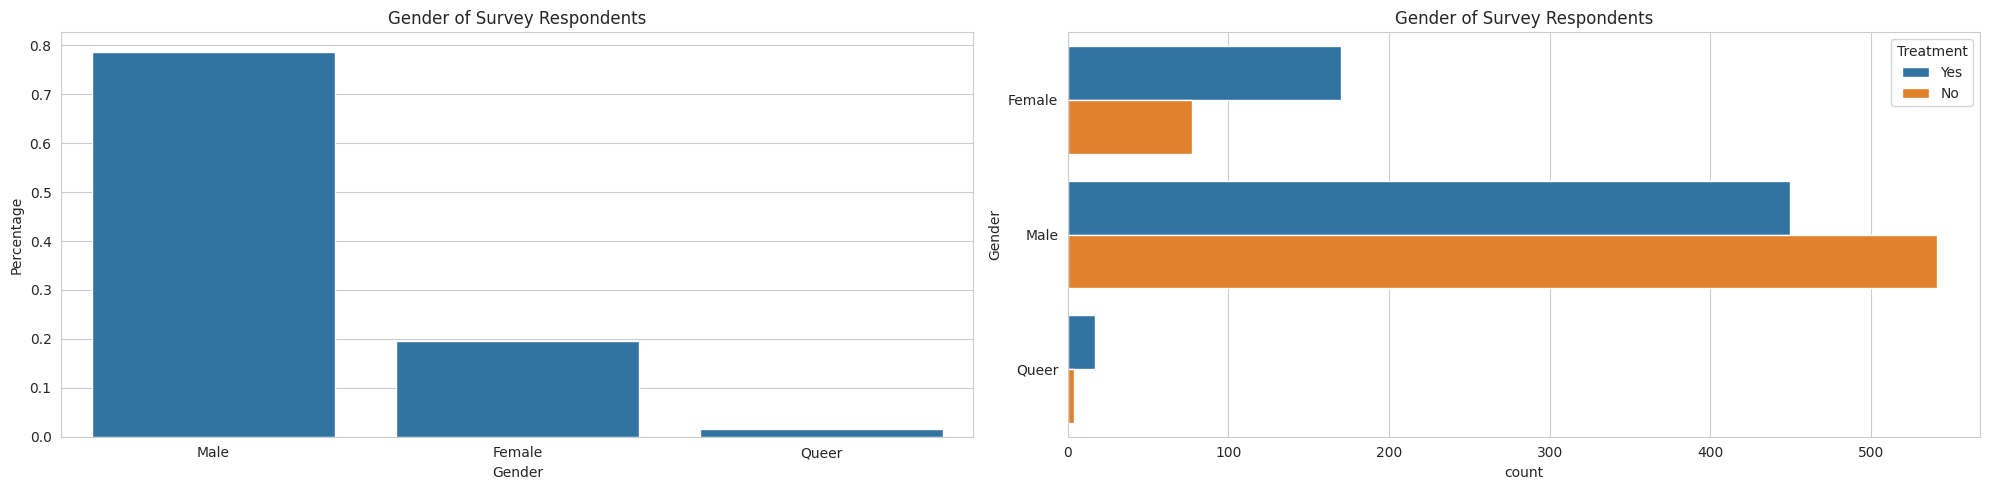

In [ ]:
# Chart for Gender
plt.figure(figsize = (20, 5))

# Bar plot for Gender distribution
plt.subplot(1, 2, 1)
eda_percentage = mhdata['Gender'].value_counts(normalize=True).rename_axis('Gender').reset_index(name='Percentage')
sns.barplot(x = 'Gender', y = 'Percentage', data=eda_percentage.head(10))
plt.title('Gender of Survey Respondents')

# Count plot for Gender with hue by Treatment
plt.subplot(1, 2, 2)
sns.countplot(y = mhdata['Gender'], hue=mhdata['Treatment'])
plt.title('Gender of Survey Respondents')

plt.tight_layout()
plt.show()

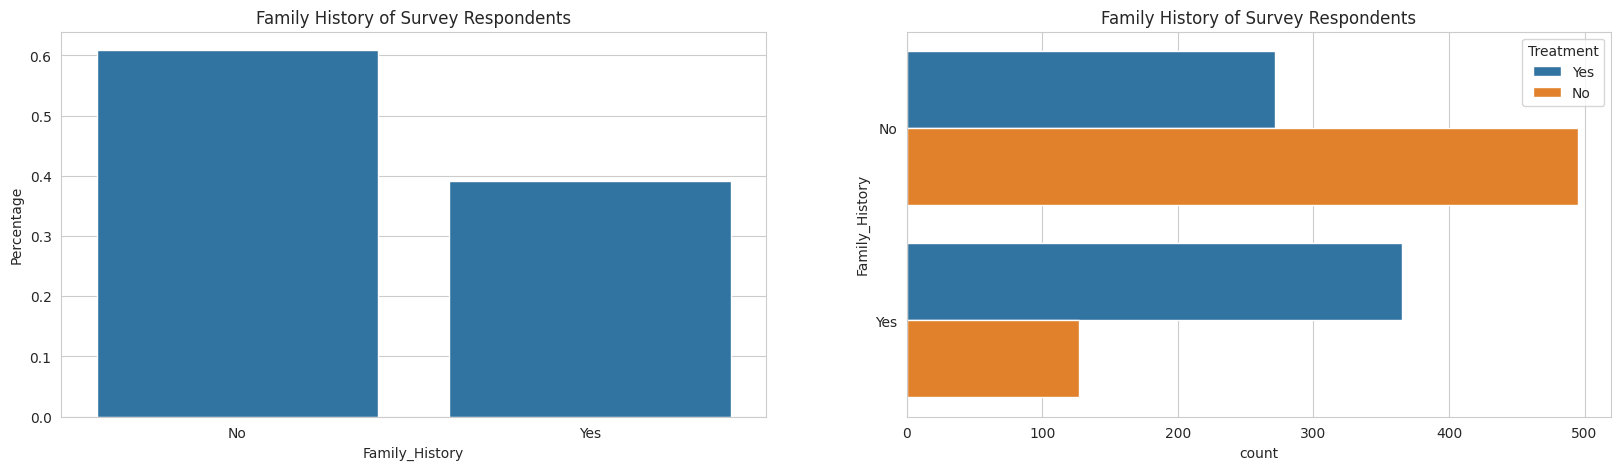

In [ ]:
# Chart for Family History
plt.figure(figsize = (20,5))

# Bar plot for Family History distribution
plt.subplot(1,2,1)
eda_percentage = mhdata['Family_History'].value_counts(normalize = True).rename_axis('Family_History').reset_index(name = 'Percentage')
sns.barplot(x = 'Family_History', y = 'Percentage', data = eda_percentage)
plt.title('Family History of Survey Respondents')

# Count plot for Family History with hue by Treatment
plt.subplot(1,2,2)
sns.countplot(y = mhdata['Family_History'], hue = mhdata['Treatment'])
plt.title('Family History of Survey Respondents')
plt.show()

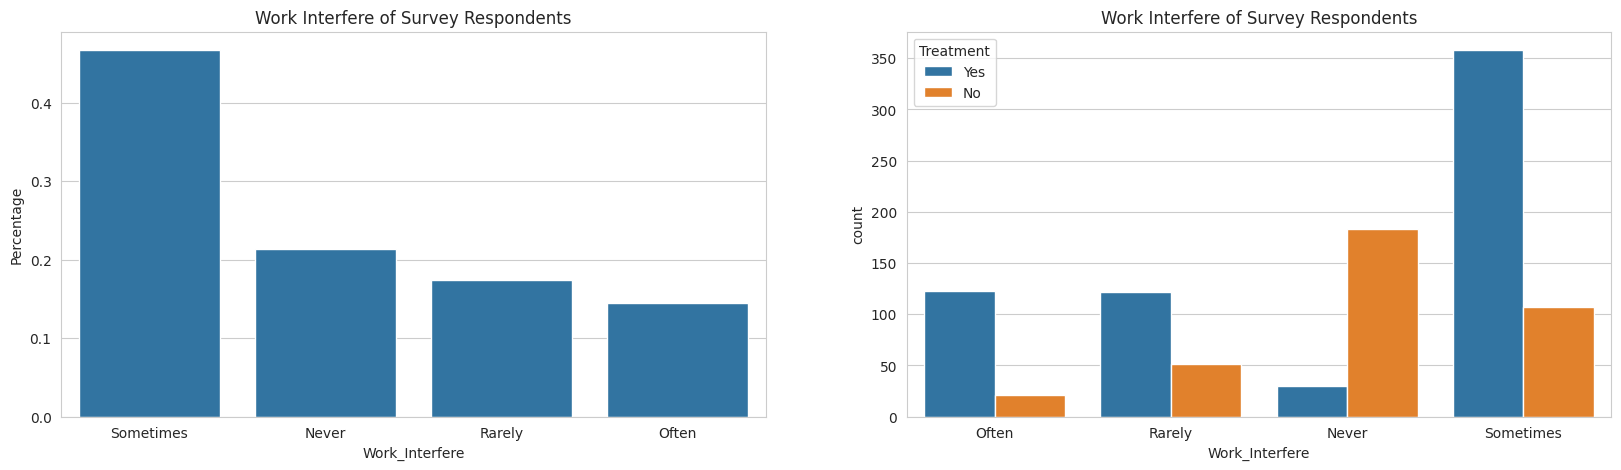

In [ ]:
# Chart for Work Interference (of mental health)
plt.figure(figsize = (20,5))

# Bar plot for Work Interference distribution
plt.subplot(1,2,1)
eda_percentage = mhdata['Work_Interfere'].value_counts(normalize = True).rename_axis('Work_Interfere').reset_index(name = 'Percentage')
sns.barplot(x = 'Work_Interfere', y = 'Percentage', data = eda_percentage)
plt.title('Work Interfere of Survey Respondents')

# Count plot for Work Interference with hue by Treatment
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Work_Interfere'], hue = mhdata['Treatment'])
plt.title('Work Interfere of Survey Respondents')
plt.show()

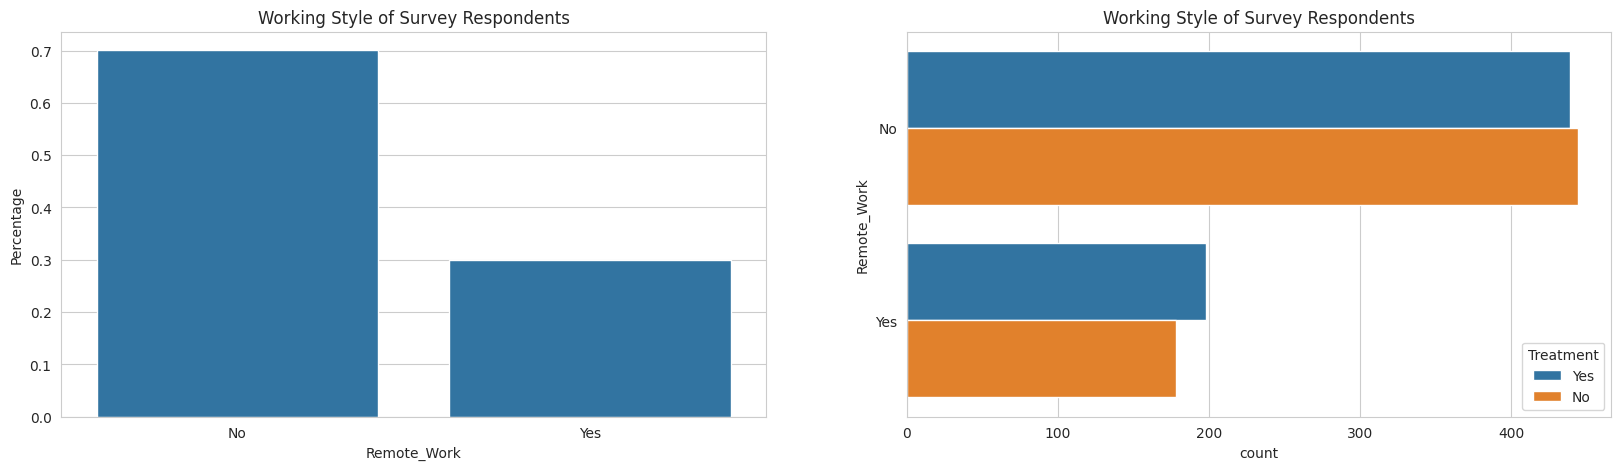

In [ ]:
# Same comment as the previous ones. This will be the last comment for EDA
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Remote_Work'].value_counts(normalize = True).rename_axis('Remote_Work').reset_index(name = 'Percentage')
sns.barplot(x = 'Remote_Work', y = 'Percentage', data = eda_percentage)
plt.title('Working Style of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(y = mhdata['Remote_Work'], hue = mhdata['Treatment'])
plt.title('Working Style of Survey Respondents')
plt.show()

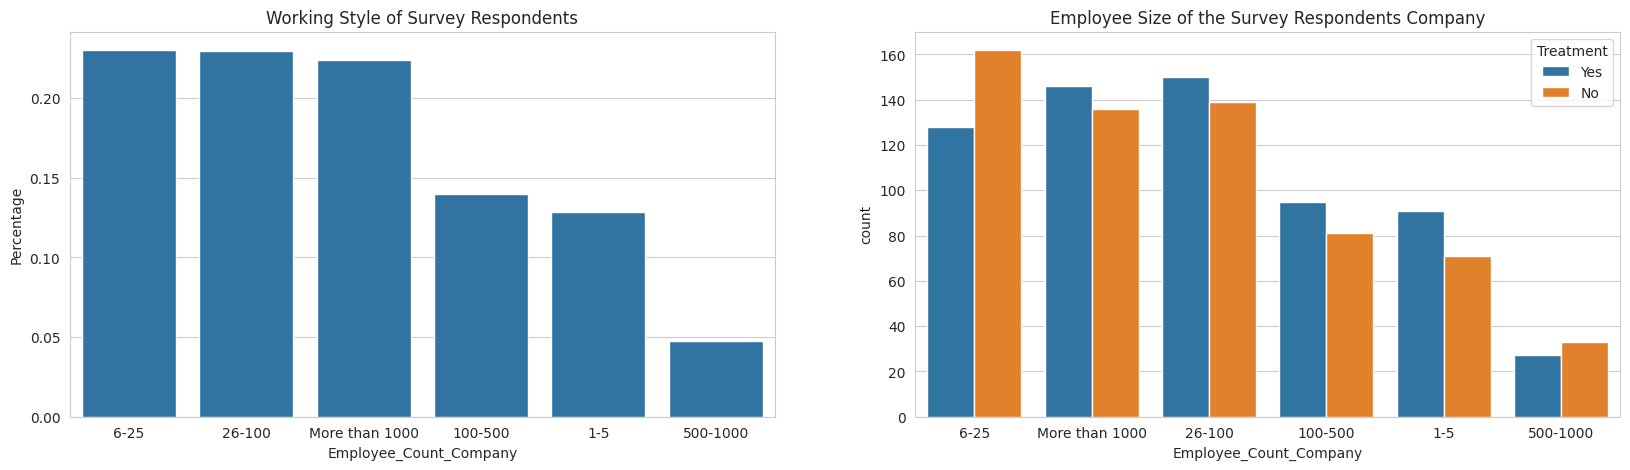

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Employee_Count_Company'].value_counts(normalize = True).rename_axis('Employee_Count_Company').reset_index(name = 'Percentage')
sns.barplot(x = 'Employee_Count_Company', y = 'Percentage', data = eda_percentage)
plt.title('Working Style of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Employee_Count_Company'], hue = mhdata['Treatment'])
plt.title('Employee Size of the Survey Respondents Company')
plt.show()


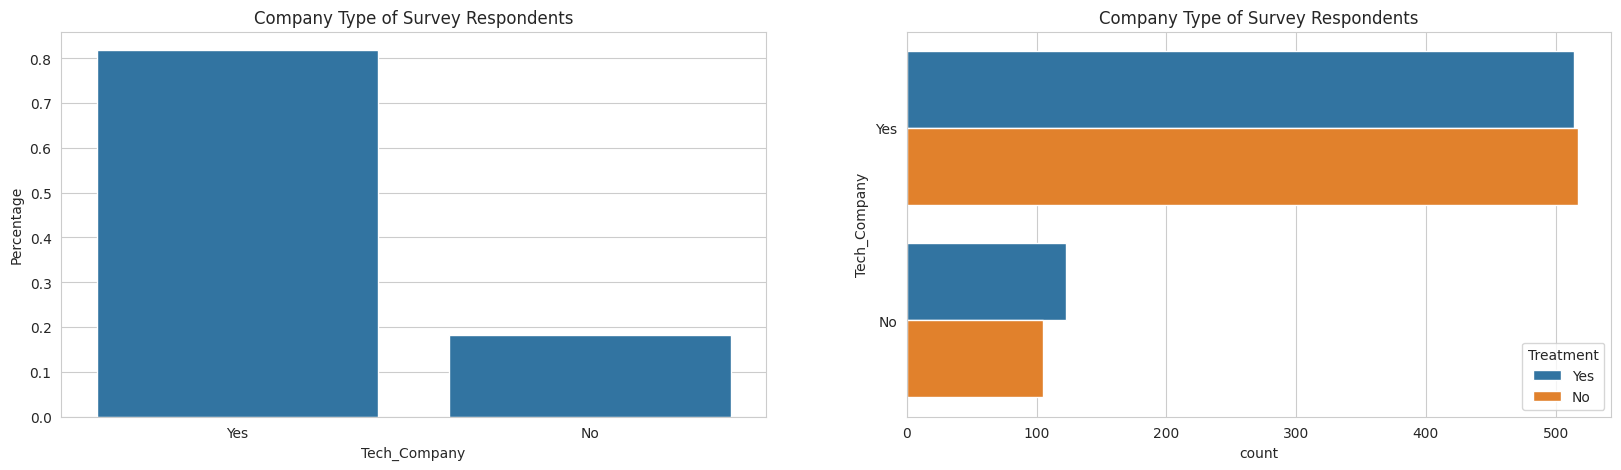

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Tech_Company'].value_counts(normalize = True).rename_axis('Tech_Company').reset_index(name = 'Percentage')
sns.barplot(x = 'Tech_Company', y = 'Percentage', data = eda_percentage)
plt.title('Company Type of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(y = mhdata['Tech_Company'], hue = mhdata['Treatment'])
plt.title('Company Type of Survey Respondents')
plt.show()

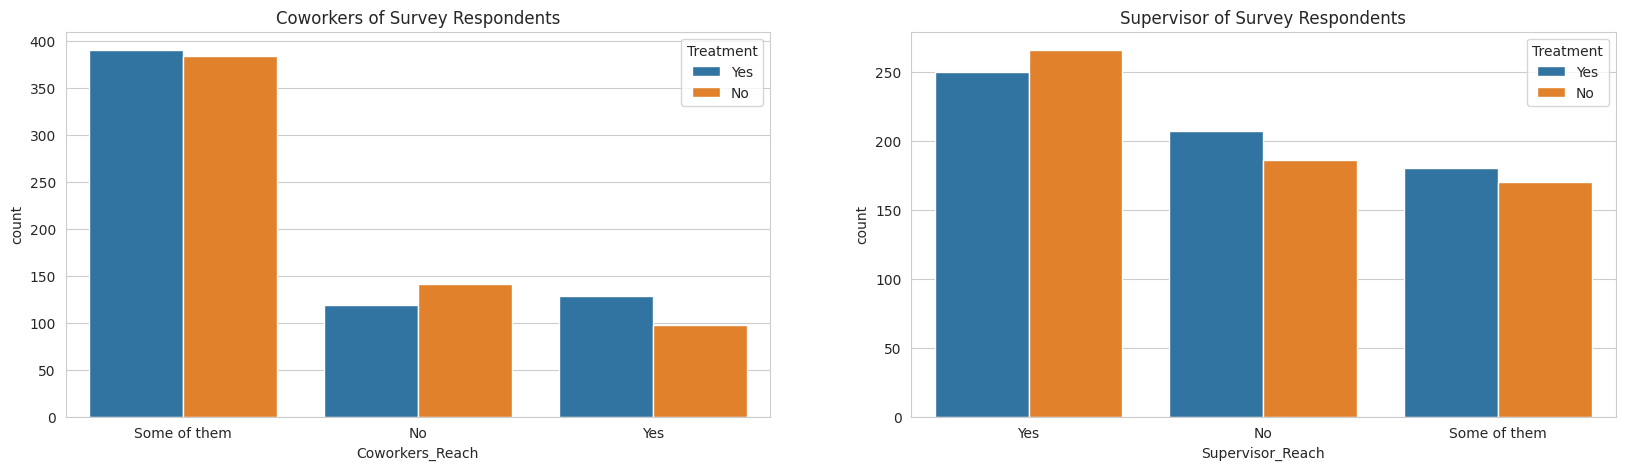

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(x = mhdata['Coworkers_Reach'], hue = mhdata['Treatment'])
plt.title('Coworkers of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Supervisor_Reach'], hue = mhdata['Treatment'])
plt.title('Supervisor of Survey Respondents')
plt.show()

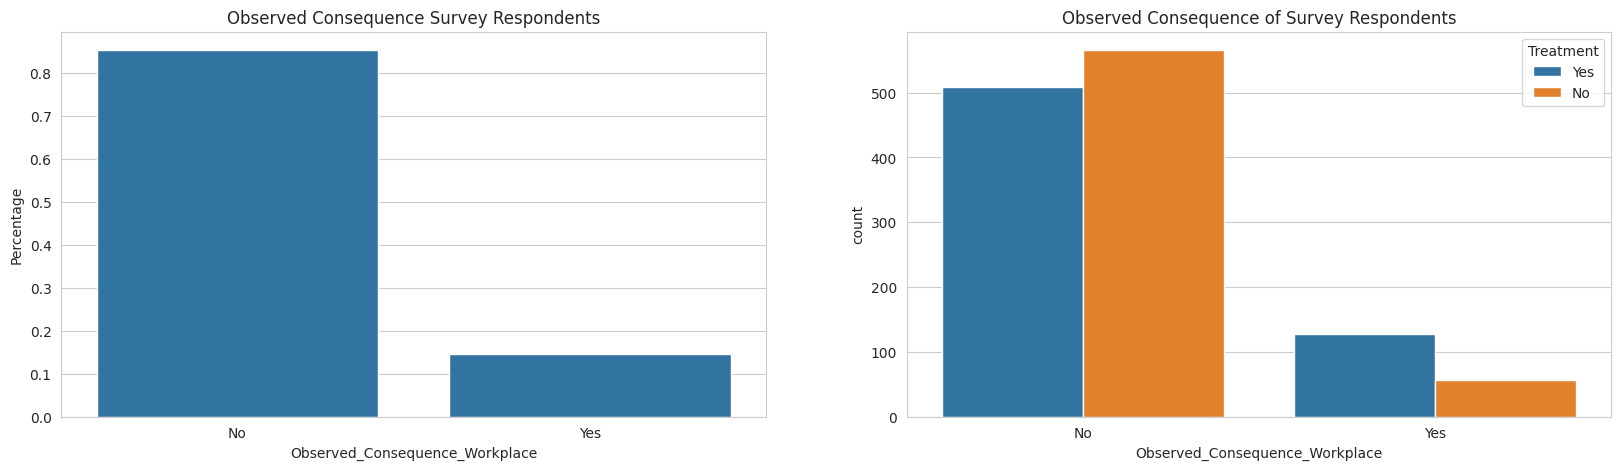

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Observed_Consequence_Workplace'].value_counts(normalize = True).rename_axis('Observed_Consequence_Workplace').reset_index(name = 'Percentage')
sns.barplot(x = 'Observed_Consequence_Workplace', y = 'Percentage', data = eda_percentage)
plt.title('Observed Consequence Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Observed_Consequence_Workplace'], hue = mhdata['Treatment'])
plt.title('Observed Consequence of Survey Respondents')
plt.show()

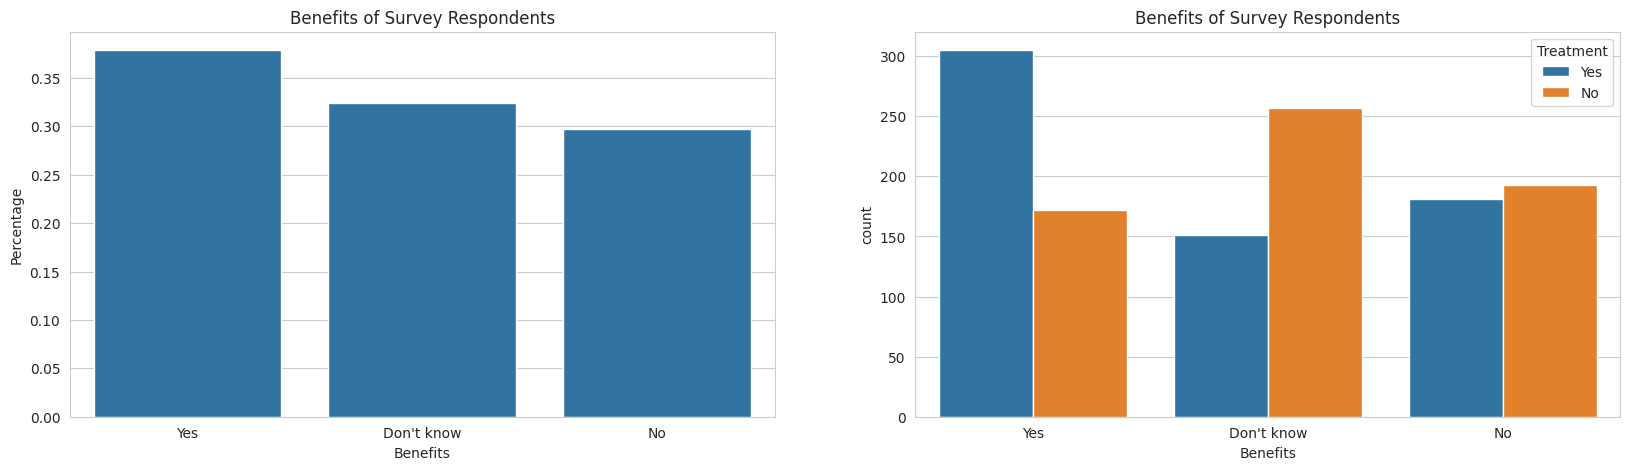

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Benefits'].value_counts(normalize = True).rename_axis('Benefits').reset_index(name = 'Percentage')
sns.barplot(x = 'Benefits', y = 'Percentage', data = eda_percentage)
plt.title('Benefits of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Benefits'], hue = mhdata['Treatment'])
plt.title('Benefits of Survey Respondents')
plt.show()

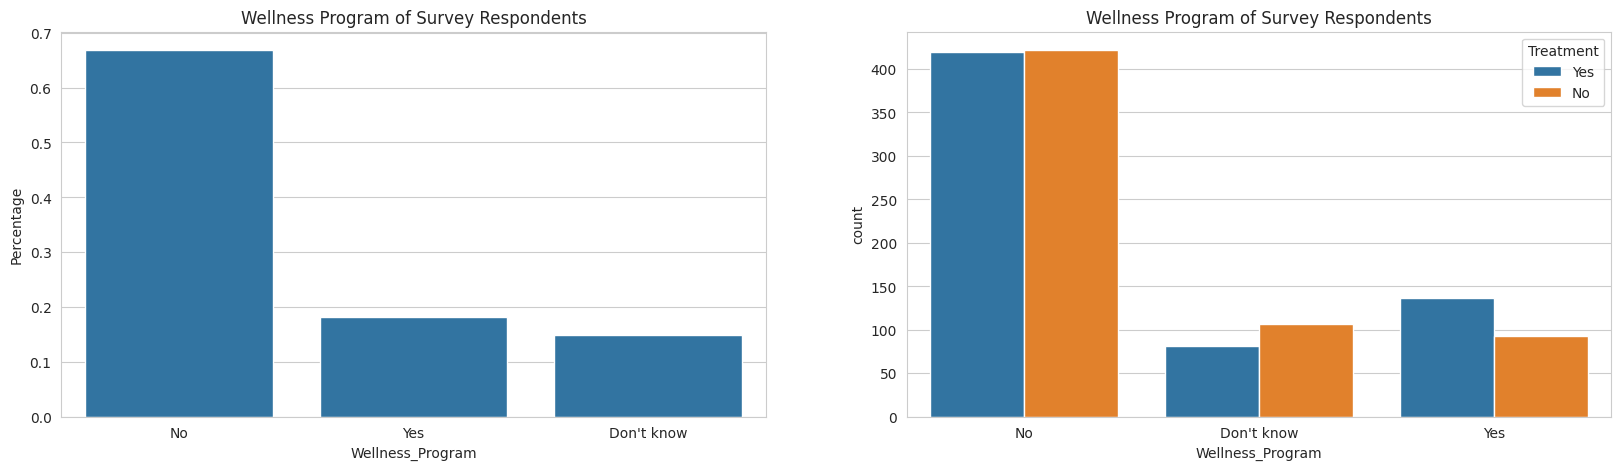

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Wellness_Program'].value_counts(normalize = True).rename_axis('Wellness_Program').reset_index(name = 'Percentage')
sns.barplot(x = 'Wellness_Program', y = 'Percentage', data = eda_percentage)
plt.title('Wellness Program of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Wellness_Program'], hue = mhdata['Treatment'])
plt.title('Wellness Program of Survey Respondents')
plt.show()

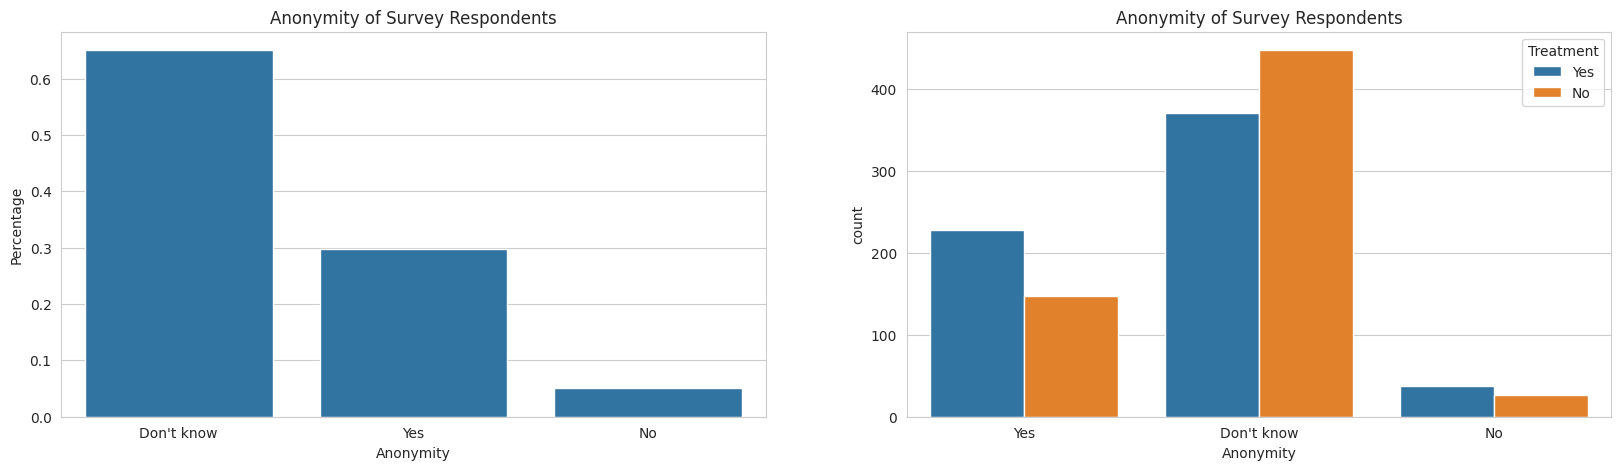

In [ ]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = mhdata['Anonymity'].value_counts(normalize = True).rename_axis('Anonymity').reset_index(name = 'Percentage')
sns.barplot(x = 'Anonymity', y = 'Percentage', data = eda_percentage)
plt.title('Anonymity of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(x = mhdata['Anonymity'], hue = mhdata['Treatment'])
plt.title('Anonymity of Survey Respondents')
plt.show()

In [ ]:
mhdata['Treatment'] = np.where(mhdata['Treatment'] == 'Yes', 1, 0)

In [ ]:
mhdata.sample(10)

,Age,Gender,Self_Employed,Family_History,Treatment,Work_Interfere,Employee_Count_Company,Remote_Work,Tech_Company,Benefits,Care_Options,Wellness_Program,Seek_Help,Anonymity,Medical_Leave,Mental_Health_Consequence,Physical_Health_Consequence,Coworkers_Reach,Supervisor_Reach,Mental_Health_Interview,Physical_Health_Interview,Mental_VS_Physical,Observed_Consequence_Workplace
181,26,Female,Yes,No,0,Sometimes,6-25,No,No,No,No,No,No,Don't know,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,1,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
216,30,Male,Yes,No,1,Often,6-25,Yes,Yes,Yes,Yes,No,No,Yes,Very difficult,No,No,Some of them,Yes,Maybe,Yes,Yes,No
408,22,Male,Yes,No,0,Never,6-25,Yes,Yes,Don't know,No,No,No,Don't know,Somewhat easy,No,No,Yes,Yes,Maybe,No,Don't know,No
183,45,Male,No,No,1,Sometimes,More than 1000,No,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Don't know,Yes,Yes,Some of them,Some of them,No,No,Don't know,No
1189,40,Male,No,Yes,1,Sometimes,6-25,No,Yes,Yes,Yes,No,No,Yes,Don't know,Maybe,No,Some of them,No,No,No,Yes,No
1231,24,Male,Yes,No,1,Sometimes,6-25,Yes,Yes,No,No,No,No,Don't know,Don't know,Maybe,Maybe,Some of them,Some of them,No,Maybe,Don't know,Yes
488,26,Male,No,No,0,Sometimes,6-25,No,Yes,No,No,No,No,Yes,Very easy,Maybe,No,Some of them,Yes,No,Maybe,Yes,No
278,28,Male,No,No,1,Rarely,100-500,No,No,Yes,Yes,Yes,Don't know,Don't know,Very easy,Maybe,No,Some of them,Some of them,No,No,Yes,No
355,31,Male,No,No,1,Sometimes,500-1000,No,No,No,Yes,No,Don't know,Yes,Don't know,No,No,Some of them,No,No,No,No,No


In [ ]:
# Now, we separate our dependent and independent variables.
X = mhdata.drop(["Treatment"], axis=1)
Y = mhdata["Treatment"]

# The independent variables will be transformed into dummy variables
X = pd.get_dummies(X, drop_first=True)

# adding constant. This is a requirement of Stats Model library. It creates a new column with float value 1
X = sm.add_constant(X)

In [ ]:
# Let's see how X looks like with the dummy variables
X.head()

,const,Age,Gender_Male,Gender_Queer,Self_Employed_Yes,Family_History_Yes,Work_Interfere_Often,Work_Interfere_Rarely,Work_Interfere_Sometimes,Employee_Count_Company_100-500,Employee_Count_Company_26-100,Employee_Count_Company_500-1000,Employee_Count_Company_6-25,Employee_Count_Company_More than 1000,Remote_Work_Yes,Tech_Company_Yes,Benefits_No,Benefits_Yes,Care_Options_Not sure,Care_Options_Yes,Wellness_Program_No,Wellness_Program_Yes,Seek_Help_No,Seek_Help_Yes,Anonymity_No,Anonymity_Yes,Medical_Leave_Somewhat difficult,Medical_Leave_Somewhat easy,Medical_Leave_Very difficult,Medical_Leave_Very easy,Mental_Health_Consequence_No,Mental_Health_Consequence_Yes,Physical_Health_Consequence_No,Physical_Health_Consequence_Yes,Coworkers_Reach_Some of them,Coworkers_Reach_Yes,Supervisor_Reach_Some of them,Supervisor_Reach_Yes,Mental_Health_Interview_No,Mental_Health_Interview_Yes,Physical_Health_Interview_No,Physical_Health_Interview_Yes,Mental_VS_Physical_No,Mental_VS_Physical_Yes,Observed_Consequence_Workplace_Yes
0,1.0,37,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,True,False,True,False,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,True,True,False,False,False,False,True,False
1,1.0,44,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False
2,1.0,32,True,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True,False,True,True,False,False
3,1.0,31,True,False,False,True,True,False,False,False,True,False,False,False,False,True,True,False,False,True,True,False,True,False,True,False,True,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,True,False,True
4,1.0,31,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,False


In [ ]:
# checking the shape of our predictor for treatment
X.shape

(1259, 45)

In [ ]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:              Treatment   No. Observations:                  881
Model:                          Logit   Df Residuals:                      836
Method:                           MLE   Df Model:                           44
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.4755
Time:                        06:18:24   Log-Likelihood:                -320.29
converged:                       True   LL-Null:                       -610.63
Covariance Type:            nonrobust   LLR p-value:                 8.885e-95
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -4.2152      0.901     -4.678      0.000      -5.981      -2.449
Age                                       0.0232  

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")

Checking model performance on train set:


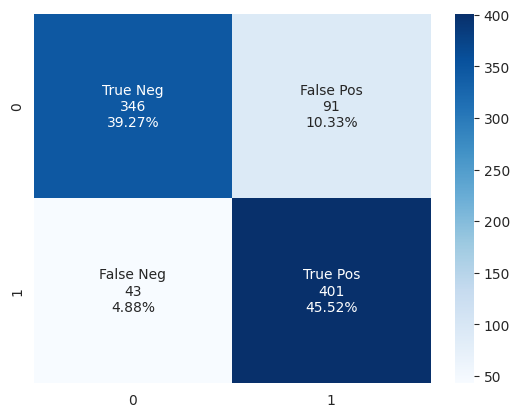

In [ ]:
print("Checking model performance on train set:")
confusion_matrix_statsmodels(lg, X_train.astype(float), y_train, threshold=0.5)

In [ ]:
print("Training performance:")
model_performance_classification(lg, X_train.astype(float), y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8479,0.903153,0.815041,0.856838


Checking model performance on test set:


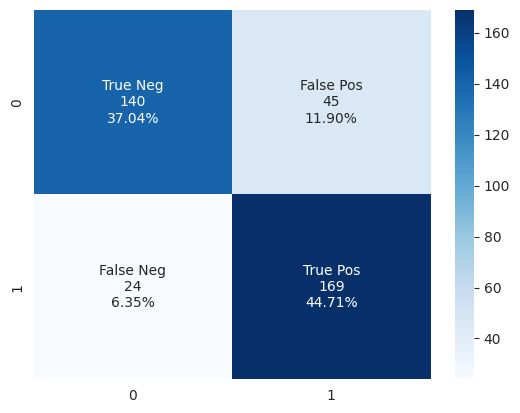

In [ ]:
print("Checking model performance on test set:")
confusion_matrix_statsmodels(lg, X_test.astype(float), y_test, threshold=0.5)

In [ ]:
print("Test performance:")
logistic_regression_perf = model_performance_classification(lg, X_test.astype(float), y_test)
logistic_regression_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.81746,0.875648,0.78972,0.830467


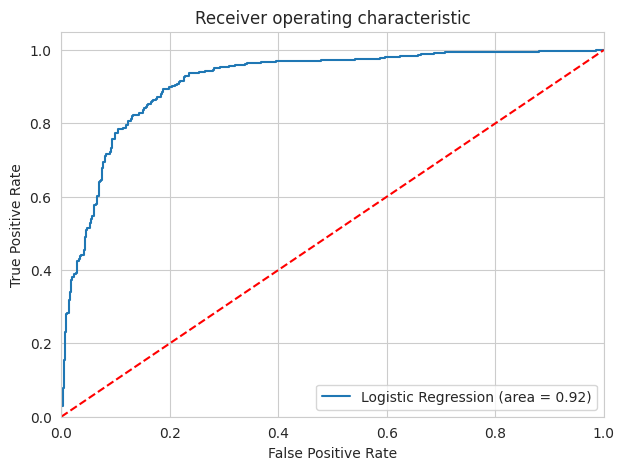

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict(X_train.astype(float)))
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train.astype(float)))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

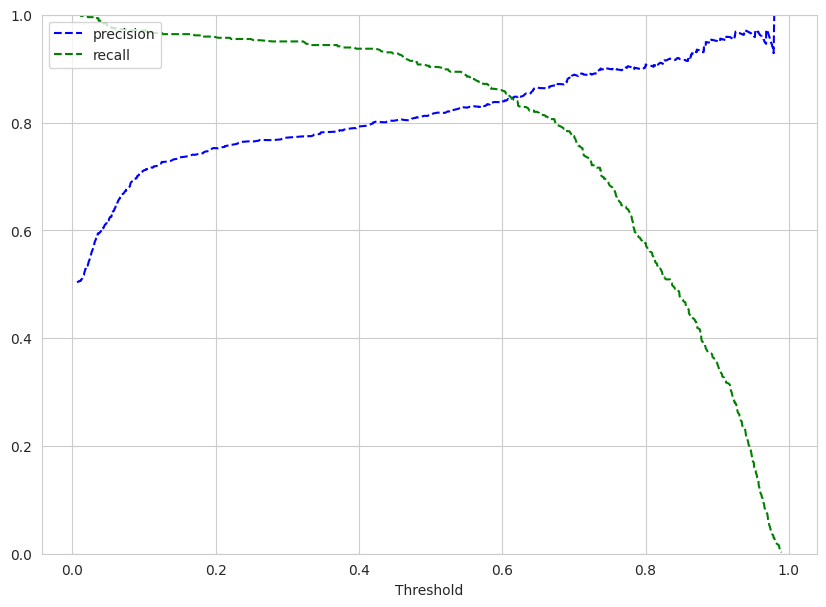

In [ ]:
# Finding the balanced threshold
y_scores = lg.predict(X_train.astype(float))
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_threshold(prec, rec, tre)
plt.show()

In [ ]:
print("Training performance:")
model_performance_classification(lg, X_train.astype(float), y_train, threshold=0.63)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.839955,0.828829,0.849885,0.839225


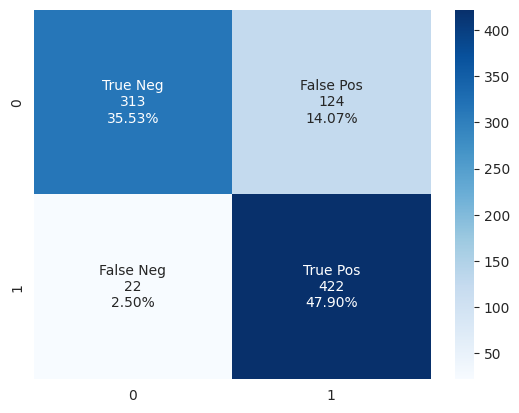

In [ ]:
confusion_matrix_statsmodels(lg, X_train.astype(float), y_train, threshold=0.3)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification(
    lg, X_train.astype(float), y_train, threshold=0.3
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve


Training performance:


,Accuracy,Recall,Precision,F1
0,0.834279,0.95045,0.772894,0.852525


Checking model performance on test set:


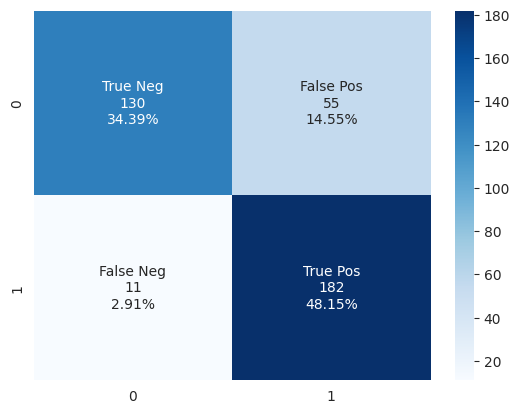

In [ ]:
print("Checking model performance on test set:")
confusion_matrix_statsmodels(lg, X_test.astype(float), y_test, threshold=0.3)

In [ ]:
print("Test performance:")
logistic_regression_tuned = model_performance_classification(lg, X_test.astype(float), y_test, threshold=0.3)
logistic_regression_tuned

Test performance:


,Accuracy,Recall,Precision,F1
0,0.825397,0.943005,0.767932,0.846512


In [ ]:
# Decision Tree Modeling
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
dTree_model_train_perf = model_performance_classification(
    dTree, X_train, y_train
)
print("Training performance:\n", dTree_model_train_perf)
dTree_model_test_perf = model_performance_classification(dTree, X_test, y_test)
print("Testing performance:\n", dTree_model_test_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.719577  0.709845    0.73262  0.721053


In [ ]:
# function to create Confusion matrix
def create_confusion_matrix(model, predictors, target, figsize=(5, 5)):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")

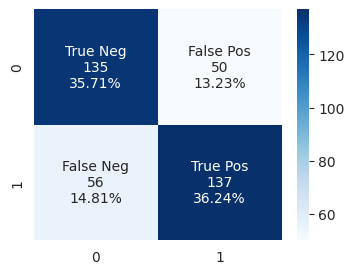

In [ ]:
# Creating confusion matrix
create_confusion_matrix(dTree, X_test, y_test, figsize=(4, 3))

In [ ]:
feature_names = list(X.columns)
print(feature_names)

['const', 'Age', 'Gender_Male', 'Gender_Queer', 'Self_Employed_Yes', 'Family_History_Yes', 'Work_Interfere_Often', 'Work_Interfere_Rarely', 'Work_Interfere_Sometimes', 'Employee_Count_Company_100-500', 'Employee_Count_Company_26-100', 'Employee_Count_Company_500-1000', 'Employee_Count_Company_6-25', 'Employee_Count_Company_More than 1000', 'Remote_Work_Yes', 'Tech_Company_Yes', 'Benefits_No', 'Benefits_Yes', 'Care_Options_Not sure', 'Care_Options_Yes', 'Wellness_Program_No', 'Wellness_Program_Yes', 'Seek_Help_No', 'Seek_Help_Yes', 'Anonymity_No', 'Anonymity_Yes', 'Medical_Leave_Somewhat difficult', 'Medical_Leave_Somewhat easy', 'Medical_Leave_Very difficult', 'Medical_Leave_Very easy', 'Mental_Health_Consequence_No', 'Mental_Health_Consequence_Yes', 'Physical_Health_Consequence_No', 'Physical_Health_Consequence_Yes', 'Coworkers_Reach_Some of them', 'Coworkers_Reach_Yes', 'Supervisor_Reach_Some of them', 'Supervisor_Reach_Yes', 'Mental_Health_Interview_No', 'Mental_Health_Interview_Yes

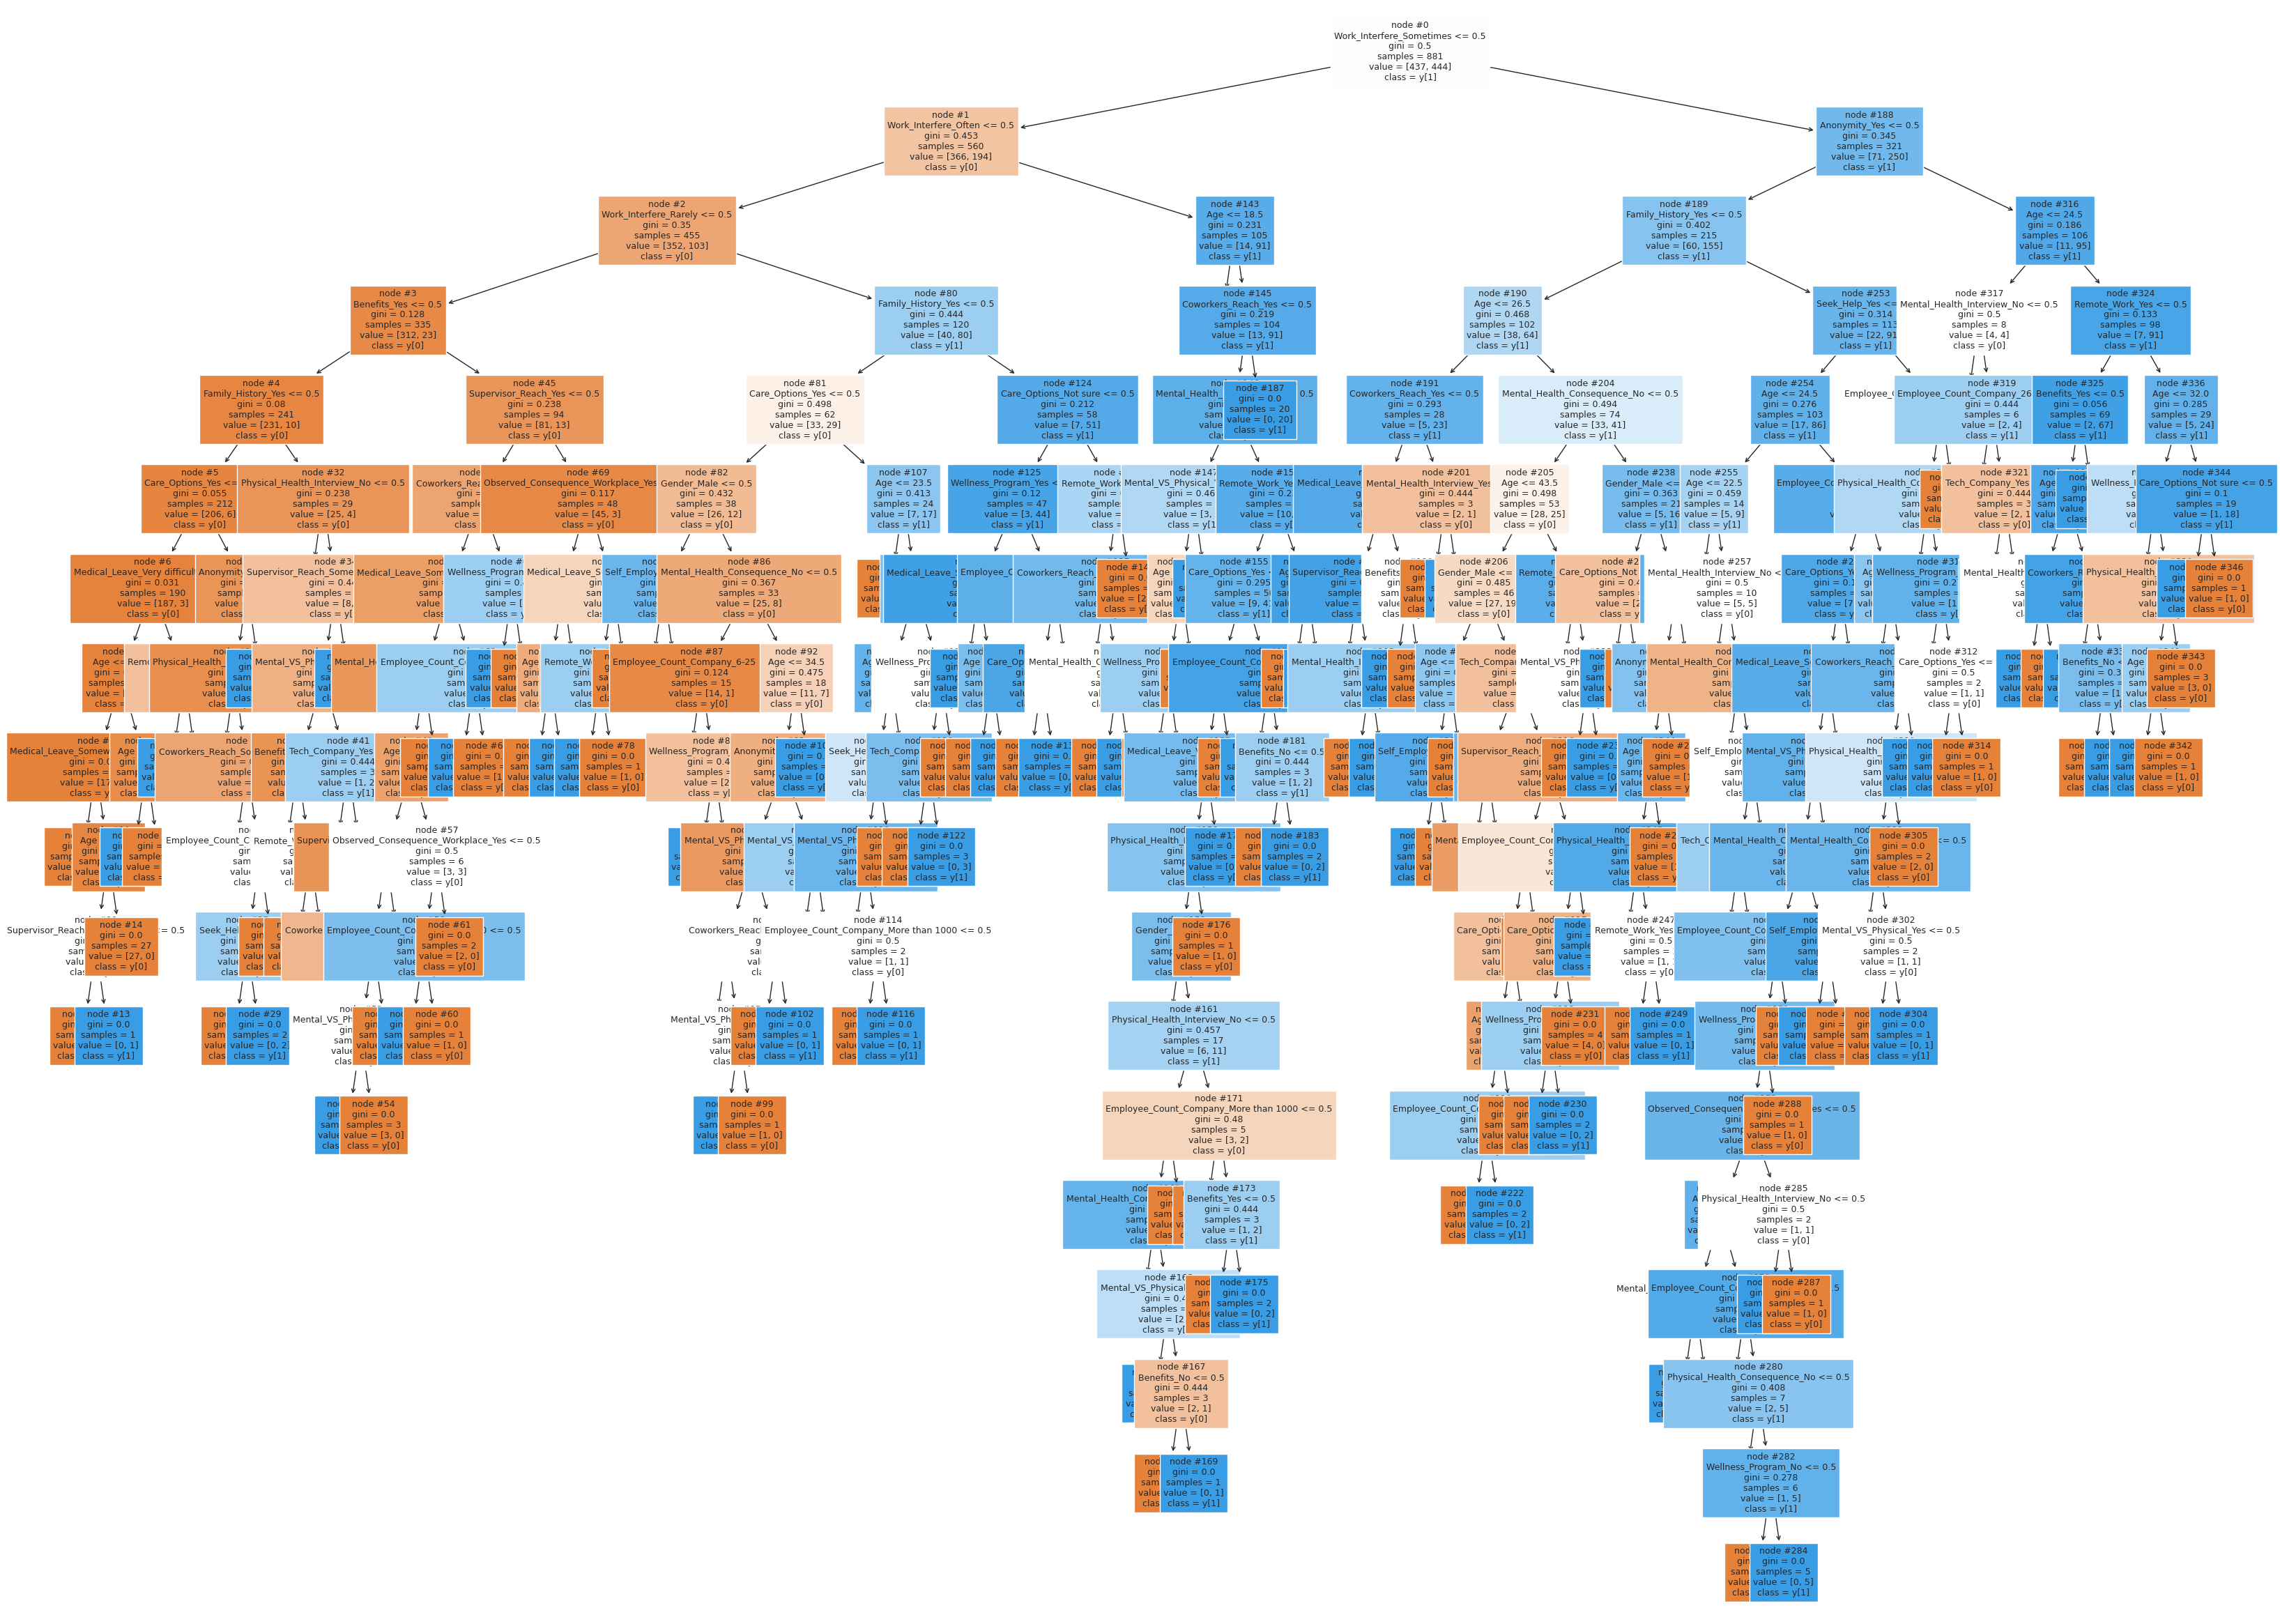

In [ ]:
plt.figure(figsize=(40, 30))
tree.plot_tree(
    dTree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [ ]:
print(tree.export_text(dTree, feature_names=feature_names, show_weights=False))

|--- Work_Interfere_Sometimes <= 0.50
|   |--- Work_Interfere_Often <= 0.50
|   |   |--- Work_Interfere_Rarely <= 0.50
|   |   |   |--- Benefits_Yes <= 0.50
|   |   |   |   |--- Family_History_Yes <= 0.50
|   |   |   |   |   |--- Care_Options_Yes <= 0.50
|   |   |   |   |   |   |--- Medical_Leave_Very difficult <= 0.50
|   |   |   |   |   |   |   |--- Age <= 40.50
|   |   |   |   |   |   |   |   |--- Medical_Leave_Somewhat easy <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Medical_Leave_Somewhat easy >  0.50
|   |   |   |   |   |   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |   |   |   |   |   |--- Supervisor_Reach_Some of them <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- Supervisor_Reach_Some of them >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Age >  26.50
|   |   |   |   |   |   |   |   |   |   |--- cl

In [ ]:
# Printing feature importances
print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                            Imp
Work_Interfere_Sometimes               0.173211
Work_Interfere_Often                   0.158811
Work_Interfere_Rarely                  0.143464
Age                                    0.102872
Family_History_Yes                     0.032140
Care_Options_Yes                       0.029858
Wellness_Program_No                    0.022249
Remote_Work_Yes                        0.020174
Mental_VS_Physical_No                  0.020010
Tech_Company_Yes                       0.018228
Physical_Health_Interview_No           0.017880
Mental_Health_Interview_No             0.017407
Gender_Male                            0.016630
Benefits_No                            0.015703
Employee_Count_Company_26-100          0.015643
Mental_Health_Consequence_Yes          0.013898
Self_Employed_Yes                      0.013281
Coworkers_Reach_Some of them           0.013153
Anonymity_Yes                          0.012630
Seek_Help_Yes                          0

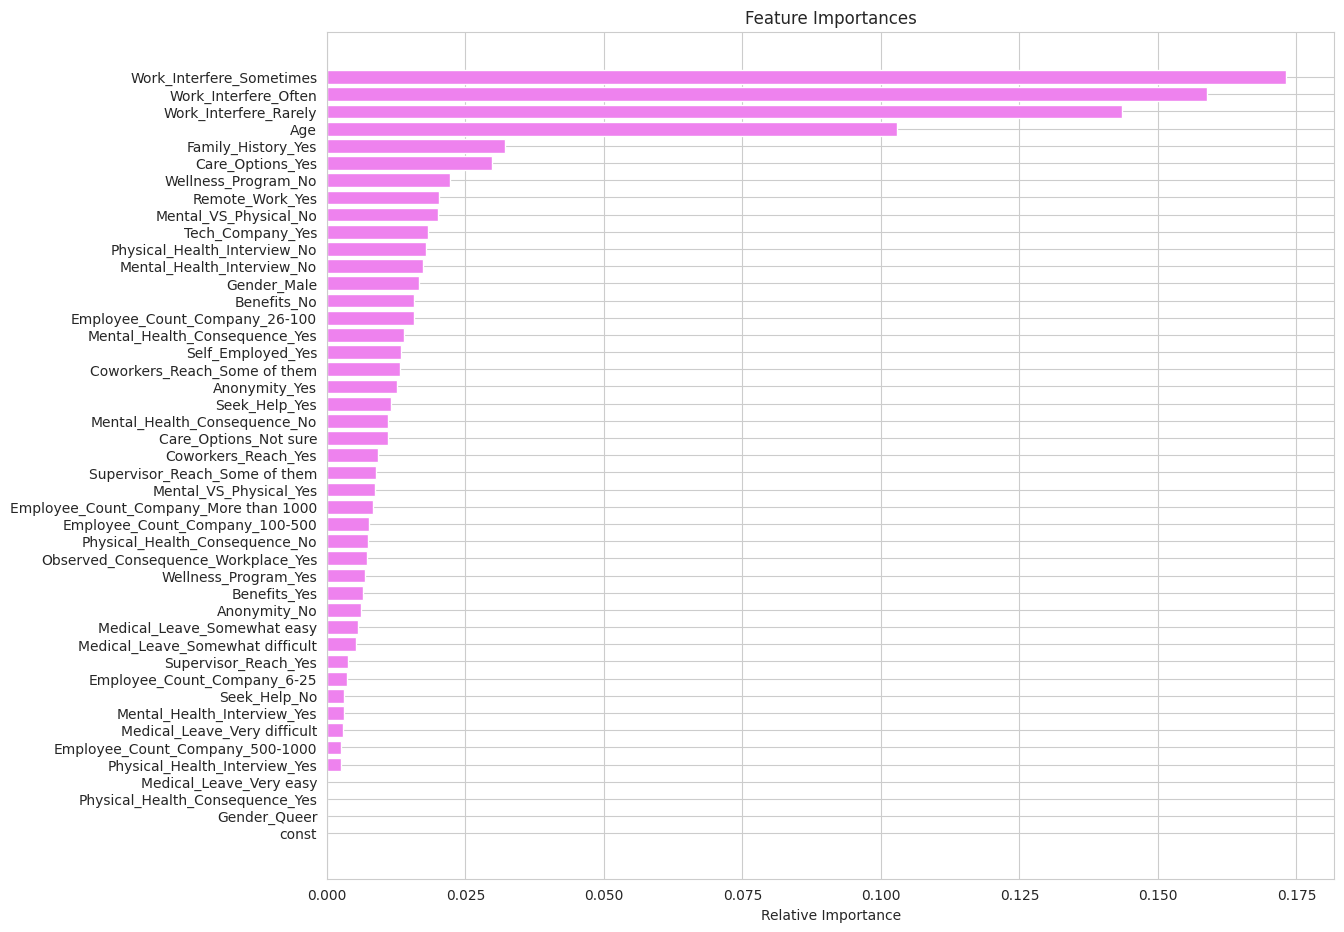

In [ ]:
# Loading feature importance in a graph to get a better understanding
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(13, 11))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# Let's reduce our depth to 4, the previous decision tree model looked too overwhelming
dTree_short = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=1)
dTree_short.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

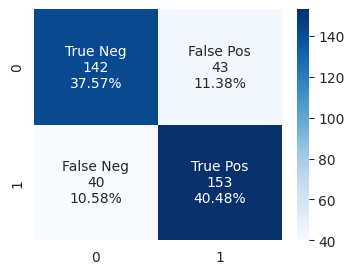

In [ ]:
create_confusion_matrix(dTree_short, X_test, y_test, figsize=(4, 3))

In [ ]:
# Calculating different metrics
dTree_short_model_train_perf = model_performance_classification(
    dTree_short, X_train, y_train
)
print("Training performance:\n", dTree_short_model_train_perf)
dTree_short_model_test_perf = model_performance_classification(dTree_short, X_test, y_test)
print("Testing performance:\n", dTree_short_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.839955  0.871622   0.821656  0.845902
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.780423  0.792746   0.780612  0.786632


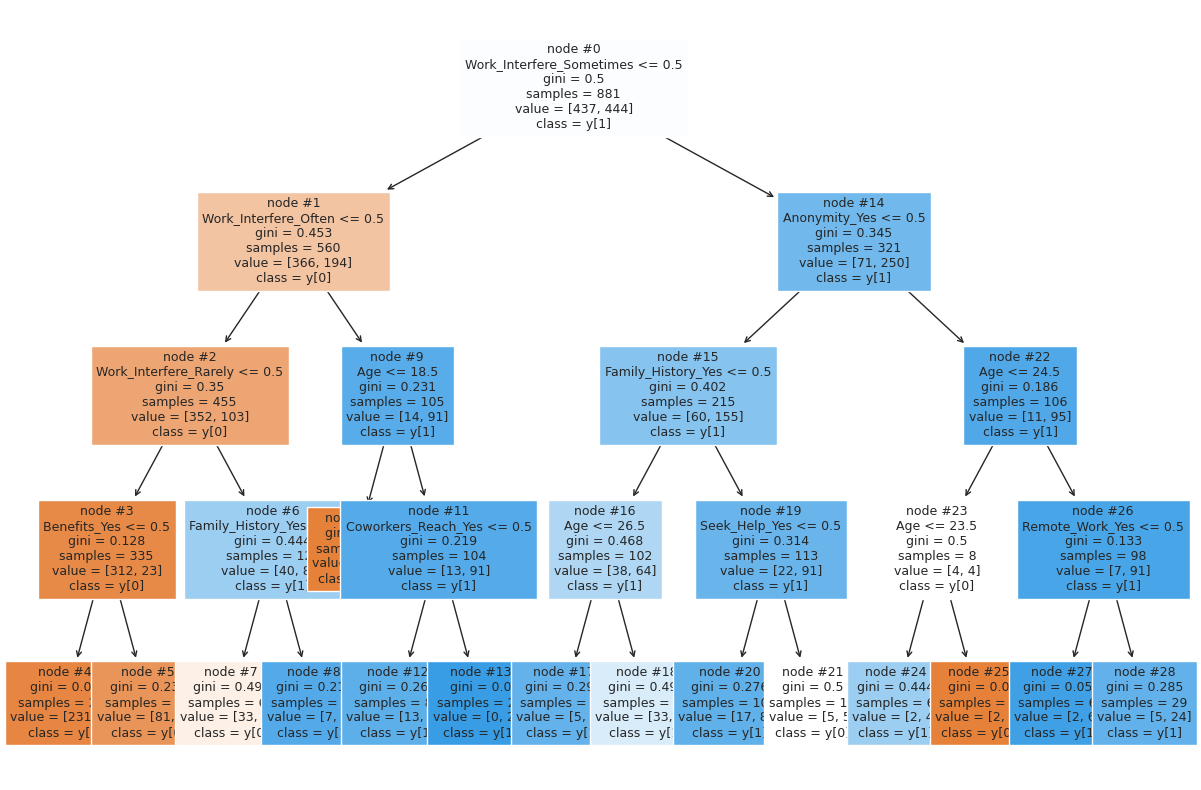

In [ ]:
plt.figure(figsize=(15, 10))

tree.plot_tree(
    dTree_short,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

In [ ]:
print(tree.export_text(dTree_short, feature_names=feature_names, show_weights=False))

|--- Work_Interfere_Sometimes <= 0.50
|   |--- Work_Interfere_Often <= 0.50
|   |   |--- Work_Interfere_Rarely <= 0.50
|   |   |   |--- Benefits_Yes <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Benefits_Yes >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Work_Interfere_Rarely >  0.50
|   |   |   |--- Family_History_Yes <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Family_History_Yes >  0.50
|   |   |   |   |--- class: 1
|   |--- Work_Interfere_Often >  0.50
|   |   |--- Age <= 18.50
|   |   |   |--- class: 0
|   |   |--- Age >  18.50
|   |   |   |--- Coworkers_Reach_Yes <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Coworkers_Reach_Yes >  0.50
|   |   |   |   |--- class: 1
|--- Work_Interfere_Sometimes >  0.50
|   |--- Anonymity_Yes <= 0.50
|   |   |--- Family_History_Yes <= 0.50
|   |   |   |--- Age <= 26.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  26.50
|   |   |   |   |--- class: 1
|   |   |--- Family_History_Yes >  0.50
|   |   |   |--- Se

In [ ]:
new_respondent = pd.DataFrame([{
    'const': 1,
    'Age': 27,
    'Gender_Male': 0,
    'Gender_Queer': 0,
    'Self_Employed_Yes': 0,
    'Family_History_Yes': 1,
    'Work_Interfere_Often': 0,
    'Work_Interfere_Rarely': 0,
    'Work_Interfere_Sometimes': 1,
    'Employee_Count_Company_100-500': 0,
    'Employee_Count_Company_26-100': 1,
    'Employee_Count_Company_500-1000': 0,
    'Employee_Count_Company_6-25': 0,
    'Employee_Count_Company_More than 1000': 0,
    'Remote_Work_Yes': 1,
    'Tech_Company_Yes': 1,
    'Benefits_No': 0,
    'Benefits_Yes': 1,
    'Care_Options_Not sure': 0,
    'Care_Options_Yes': 1,
    'Wellness_Program_No': 1,
    'Wellness_Program_Yes': 0,
    'Seek_Help_No': 0,
    'Seek_Help_Yes': 1,
    'Anonymity_No': 0,
    'Anonymity_Yes': 1,
    'Medical_Leave_Somewhat difficult': 0,
    'Medical_Leave_Somewhat easy': 0,
    'Medical_Leave_Very difficult': 0,
    'Medical_Leave_Very easy': 1,
    'Mental_Health_Consequence_No': 0,
    'Mental_Health_Consequence_Yes': 0,
    'Physical_Health_Consequence_No': 0,
    'Physical_Health_Consequence_Yes': 0,
    'Coworkers_Reach_Some of them': 0,
    'Coworkers_Reach_Yes': 1,
    'Supervisor_Reach_Some of them': 0,
    'Supervisor_Reach_Yes': 0,
    'Mental_Health_Interview_No': 0,
    'Mental_Health_Interview_Yes': 0,
    'Physical_Health_Interview_No': 0,
    'Physical_Health_Interview_Yes': 0,
    'Mental_VS_Physical_No': 0,
    'Mental_VS_Physical_Yes': 1,
    'Observed_Consequence_Workplace_Yes': 0,


}],columns=[
    'const',
    'Age',
    'Gender_Male',
    'Gender_Queer',
    'Self_Employed_Yes',
    'Family_History_Yes',
    'Work_Interfere_Often',
    'Work_Interfere_Rarely',
    'Work_Interfere_Sometimes',
    'Employee_Count_Company_100-500',
    'Employee_Count_Company_26-100',
    'Employee_Count_Company_500-1000',
    'Employee_Count_Company_6-25',
    'Employee_Count_Company_More than 1000',
    'Remote_Work_Yes',
    'Tech_Company_Yes',
    'Benefits_No',
    'Benefits_Yes',
    'Care_Options_Not sure',
    'Care_Options_Yes',
    'Wellness_Program_No',
    'Wellness_Program_Yes',
    'Seek_Help_No',
    'Seek_Help_Yes',
    'Anonymity_No',
    'Anonymity_Yes',
    'Medical_Leave_Somewhat difficult',
    'Medical_Leave_Somewhat easy',
    'Medical_Leave_Very difficult',
    'Medical_Leave_Very easy',
    'Mental_Health_Consequence_No',
    'Mental_Health_Consequence_Yes',
    'Physical_Health_Consequence_No',
    'Physical_Health_Consequence_Yes',
    'Coworkers_Reach_Some of them',
    'Coworkers_Reach_Yes',
    'Supervisor_Reach_Some of them',
    'Supervisor_Reach_Yes',
    'Mental_Health_Interview_No',
    'Mental_Health_Interview_Yes',
    'Physical_Health_Interview_No',
    'Physical_Health_Interview_Yes',
    'Mental_VS_Physical_No',
    'Mental_VS_Physical_Yes',
    'Observed_Consequence_Workplace_Yes',],)
new_respondent

,const,Age,Gender_Male,Gender_Queer,Self_Employed_Yes,Family_History_Yes,Work_Interfere_Often,Work_Interfere_Rarely,Work_Interfere_Sometimes,Employee_Count_Company_100-500,Employee_Count_Company_26-100,Employee_Count_Company_500-1000,Employee_Count_Company_6-25,Employee_Count_Company_More than 1000,Remote_Work_Yes,Tech_Company_Yes,Benefits_No,Benefits_Yes,Care_Options_Not sure,Care_Options_Yes,Wellness_Program_No,Wellness_Program_Yes,Seek_Help_No,Seek_Help_Yes,Anonymity_No,Anonymity_Yes,Medical_Leave_Somewhat difficult,Medical_Leave_Somewhat easy,Medical_Leave_Very difficult,Medical_Leave_Very easy,Mental_Health_Consequence_No,Mental_Health_Consequence_Yes,Physical_Health_Consequence_No,Physical_Health_Consequence_Yes,Coworkers_Reach_Some of them,Coworkers_Reach_Yes,Supervisor_Reach_Some of them,Supervisor_Reach_Yes,Mental_Health_Interview_No,Mental_Health_Interview_Yes,Physical_Health_Interview_No,Physical_Health_Interview_Yes,Mental_VS_Physical_No,Mental_VS_Physical_Yes,Observed_Consequence_Workplace_Yes
0,1,27,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
predictionlg = lg.predict(new_respondent)
print('Prediction:', round(predictionlg[0]))

Prediction: 1


In [ ]:
predictiondt = dTree.predict(new_respondent)
print('Prediction:', round(predictiondt[0]))

Prediction: 1


In [ ]:
predictiondts = dTree_short.predict(new_respondent)
print('Prediction:', round(predictiondts[0]))

Prediction: 1


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_regression_perf.T,
        logistic_regression_tuned.T,
        dTree_model_test_perf.T,
        dTree_short_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression Tuned",
    "Decision Tree",
    "Decision Tree Tuned",

]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression,Logistic Regression Tuned,Decision Tree,Decision Tree Tuned
Accuracy,0.817460,0.825397,0.719577,0.780423
Recall,0.875648,0.943005,0.709845,0.792746
Precision,0.789720,0.767932,0.732620,0.780612
F1,0.830467,0.846512,0.721053,0.786632
